In [7]:
import colorednoise
import matplotlib.pyplot as plt
# from utils import *
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import os
%matplotlib inline

In [3]:
def mix_db(x,y,db):
    E_x = np.mean(x**2)
    E_y = np.mean(y**2)
    
    a = E_x/(E_y*(10**(db/10)))
    lam = 1/(1+a)
    return lam*x+(1-lam)*y

In [4]:
[x,egg],sr = librosa.load('/workspace/SpeechToEGG/datasets/TrainData/CMU/bdl_arctic_a0001.wav',sr=16000,mono=False)
[y,egg_2],sr = librosa.load('/workspace/SpeechToEGG/datasets/TestData/saarbrucken/1196-a_lhl.wav',sr=16000,mono=False)

In [5]:
music,sr = librosa.load('/workspace/SpeechToEGG/datasets/TrainData/musical_noise/other_96.wav',sr=16000)
babble,sr = librosa.load('/workspace/SpeechToEGG/datasets/TrainData/normal_noise/babble.wav',sr=16000)

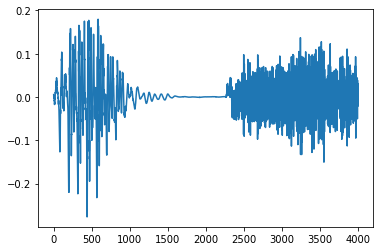

In [16]:
plt.plot(x[32000:36000])

In [27]:
ipd.Audio(x[32000:36000],rate=16000)

In [26]:
ipd.Audio(egg[32000:36000],rate=16000)

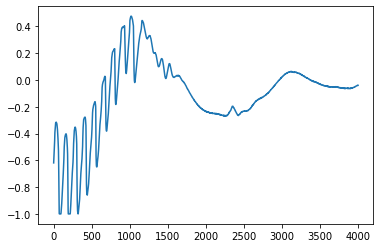

In [20]:
plt.plot(egg[32000:36000])

(257, 32)


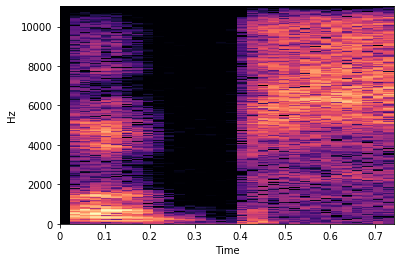

In [28]:
stft = np.abs(librosa.core.stft(np.asfortranarray(x[32000:36000]),n_fft=512,hop_length=128).imag)
print(stft.shape)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='linear', x_axis='time')

(257, 32)


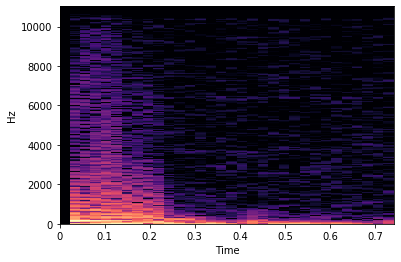

In [29]:
stft = np.abs(librosa.core.stft(np.asfortranarray(egg[32000:36000]),n_fft=512,hop_length=128).imag)
print(stft.shape)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='log', x_axis='time')

In [83]:
np.mean(x[0:20000]**2)

0.0069322144

In [119]:
stft.real.max()

0.03488137

In [53]:
np.log(np.abs(stft.real)).min()

-18.161942

In [69]:
np.log(np.abs(stft.imag)+1e-8).max()

3.2789118

(257, 33)


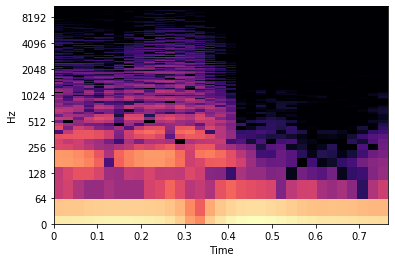

In [72]:
stft = np.abs(librosa.core.stft(np.asfortranarray(egg[5000:7048]),n_fft=512,hop_length=64).real)
print(stft.shape)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='log', x_axis='time')

In [84]:
stft = librosa.core.stft(np.asfortranarray(egg[5000:7048]),n_fft=512,hop_length=64)

In [86]:
stft.real.shape

(257, 33)

In [87]:
stft.imag.shape

(257, 33)

In [88]:
np.sqrt(0.1)

0.31622776601683794

In [92]:
np.concatenate([stft.real,stft.imag],axis=1).shape

(257, 66)

In [105]:
np.pad(stft,pad_width = (0,3),mode='edge').shape

(260, 36)

In [116]:
np.pad([1]*20000,pad_width = (0,3),mode='constant')

array([1, 1, 1, ..., 0, 0, 0])

In [94]:
amp = stft.real

In [98]:
amp[:,:,np.newaxis].shape

(257, 33, 1)

(257, 33)


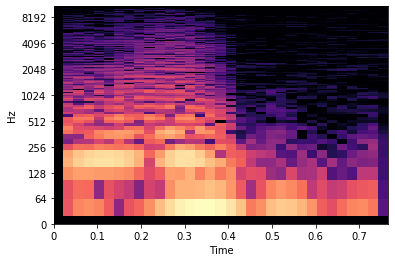

In [71]:
stft = np.abs(librosa.core.stft(np.asfortranarray(egg[5000:7048].real),n_fft=512,hop_length=64).imag)
print(stft.shape)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='log', x_axis='time')

In [56]:
stft = librosa.core.stft(np.asfortranarray(egg[:]),n_fft=512,hop_length=128)

In [57]:
np.log(np.abs(stft.real)).min()

-16.08004

In [58]:
np.log(np.abs(stft.imag)+1e-8).min()

-18.420681